In [1]:
import pandas as pd
import numpy as np
path = "/Users/shuyi/Documents/OMSCS/MachineLearning/HW1/mentalHealthData/"
train_data_file = "step1.csv"
# load the data from preprocessing and feature engineering
train_data = pd.read_csv(path + train_data_file)

In [2]:
del train_data["Unnamed: 0"]

In [3]:
train_data[:5]

,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age Category
0,female,United States,No,Yes,Often,6-25,No,Yes,Yes,Not sure,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,40
1,male,United States,No,No,Rarely,More than 1000,No,No,Don't know,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,60
2,male,Canada,No,No,Rarely,6-25,No,Yes,No,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,40
3,male,United Kingdom,Yes,Yes,Often,26-100,No,Yes,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,40
4,male,United States,No,No,Never,100-500,Yes,Yes,Yes,No,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,40


In [4]:
target_y = train_data["treatment"]
train_x = train_data.copy().drop(["treatment"], 1)

In [5]:
train_x[:5]

,Gender,Country,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age Category
0,female,United States,No,Often,6-25,No,Yes,Yes,Not sure,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,40
1,male,United States,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,60
2,male,Canada,No,Rarely,6-25,No,Yes,No,No,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,40
3,male,United Kingdom,Yes,Often,26-100,No,Yes,No,Yes,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,40
4,male,United States,No,Never,100-500,Yes,Yes,Yes,No,Don't know,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,40


encode the y categorical value to numerical

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(target_y)

LabelEncoder()

In [7]:
target_y = le.transform(target_y) 

In [8]:
set(target_y)

{0, 1}

Select the features with high variablitity and Enconde the x features by one-hot encoding

In [9]:
# Selection of variables with higher variability
# data <- data.frame(gender= data$Gender,
#                    family_history= data$family_history,
#                    work_interfere= data$work_interfere,
#                    benefits= data$benefits, 
#                    care_options= data$care_options,
#                    anonymity= data$anonymity,
#                    treatment=data$treatment)
col_selected = ['Gender', 'family_history', 'work_interfere', 'benefits', 'care_options', 'anonymity' ]
train_x_selected = train_x[col_selected]
train_x_selected[:5]

,Gender,family_history,work_interfere,benefits,care_options,anonymity
0,female,No,Often,Yes,Not sure,Yes
1,male,No,Rarely,Don't know,No,Don't know
2,male,No,Rarely,No,No,Don't know
3,male,Yes,Often,No,Yes,No
4,male,No,Never,Yes,No,Don't know


In [10]:
train_x_selected = pd.get_dummies(train_x_selected, columns=["Gender",])

In [11]:
train_x_selected = pd.get_dummies(train_x_selected, columns=["family_history", "work_interfere", "benefits", "care_options", "anonymity"])
train_x_selected.head()

,Gender_female,Gender_genderqueer,Gender_male,Gender_trans female,family_history_No,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,benefits_Don't know,benefits_No,benefits_Yes,care_options_No,care_options_Not sure,care_options_Yes,anonymity_Don't know,anonymity_No,anonymity_Yes
0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
2,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
4,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import StratifiedKFold

Decision Trees. For the decision tree, you should implement or steal a decision tree algorithm (and by "implement or steal" I mean "steal"). Be sure to use some form of pruning. You are not required to use information gain (for example, there is something called the GINI index that is sometimes used) to split attributes, but you should describe whatever it is that you do use.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train_x_selected, target_y, random_state=0)
estimator = DecisionTreeClassifier(random_state=0)
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [14]:
estimator.score(X_test, y_test)

0.77388535031847139

In [15]:
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
tree.export_graphviz(estimator, out_file=dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


InvocationException: GraphViz's executables not found

Cross validation and parameters tuning

In [24]:
from matplotlib import pyplot as plt
def plotCV(results, parameter, x_min, x_max, x_gap):
    plt.figure(figsize=(13, 13))
    plt.title("GridSearchCV evaluating using f1-micro and accuracy",
              fontsize=16)

    plt.xlabel(parameter)
    plt.ylabel("Score")
    plt.grid()
    ax = plt.axes()
    ax.set_xlim(x_min, x_max, x_gap)
    ax.set_ylim(0, 1)

    # Get the regular numpy array from the MaskedArray
    X_axis = np.array(results['param_' + parameter].data, dtype=float)
    for scorer, color in zip(sorted(scoring), ['g', 'k']):
        for sample, style in (('train', '--'), ('test', '-')):
            sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
            sample_score_std = results['std_%s_%s' % (sample, scorer)]
            ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                            sample_score_mean + sample_score_std,
                            alpha=0.1 if sample == 'test' else 0, color=color)
            ax.plot(X_axis, sample_score_mean, style, color=color,
                    alpha=1 if sample == 'test' else 0.7,
                    label="%s (%s)" % (scorer, sample))

        best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
        best_score = results['mean_test_%s' % scorer][best_index]

        # Plot a dotted vertical line at the best score for that scorer marked by x
        ax.plot([X_axis[best_index], ] * 2, [0, best_score],
                linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

        # Annotate the best score for that scorer
        ax.annotate("%0.2f" % best_score,
                    (X_axis[best_index], best_score + 0.005))

    plt.legend(loc="best")
    plt.grid('off')
    plt.show()

In [21]:
scoring = {'F1': 'f1_micro', 'Accuracy': make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_parameters_`` and
# ``gs.best_index_``
stratifiedKFold = StratifiedKFold(5, False, 0)
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'max_depth': range(1, 20, 2)},
                  scoring=scoring, cv = stratifiedKFold, refit='F1')
gs.fit(train_x_selected, target_y)
results = gs.cv_results_

/Users/shuyi/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shuyi/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_Accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/shuyi/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_Accuracy'), which will not b

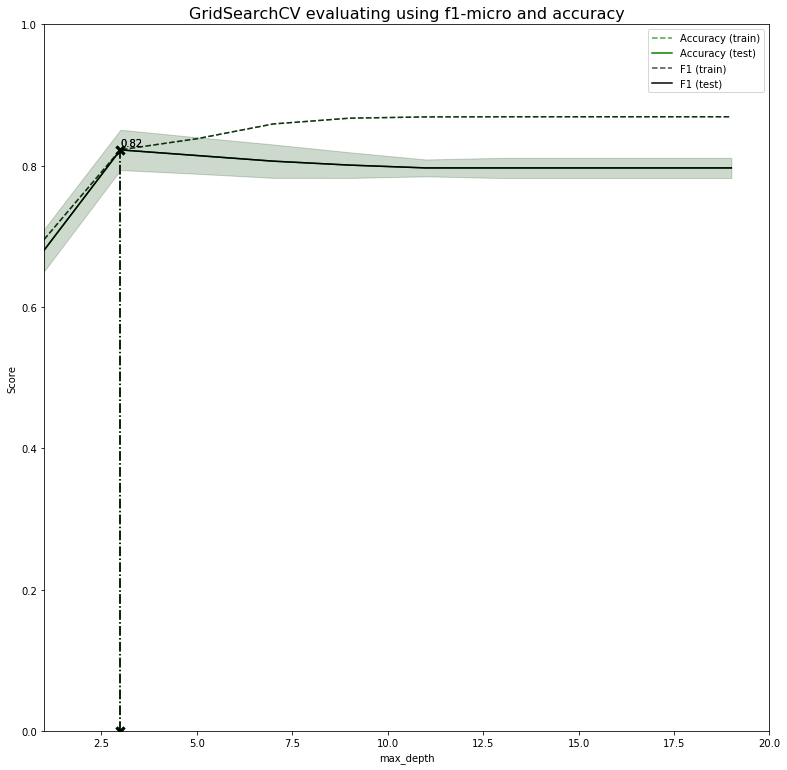

In [38]:
plotCV(results, "max_depth", 1, 20, 2)

In [51]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42, max_depth=3),
                  param_grid={'max_leaf_nodes': range(2, 50, 5)},
                  scoring=scoring, cv = stratifiedKFold, refit='F1')
gs.fit(train_x_selected, target_y)
results = gs.cv_results_

/Users/shuyi/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shuyi/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_Accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/shuyi/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_Accuracy'), which will not b

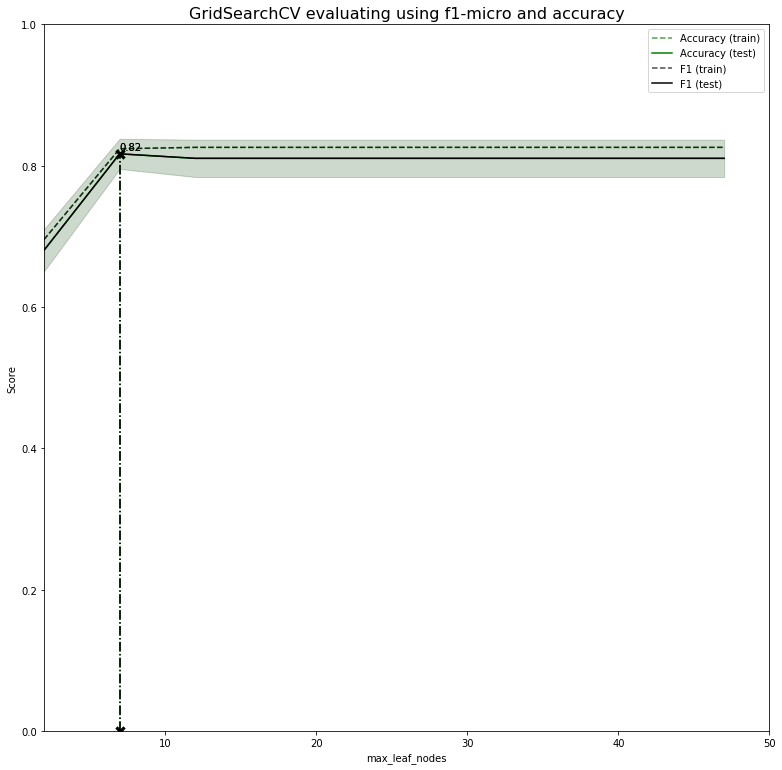

In [52]:
plotCV(results, "max_leaf_nodes", 2, 50, 5)

Boosting. Implement or steal a boosted version of your decision trees. As before, you will want to use some form of pruning, but presumably because you're using boosting you can afford to be much more aggressive about your pruning.

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
#X_train, X_test, y_train, y_test = train_test_split(train_x, target_y, random_state=0)

In [57]:
bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3, min_samples_split=5, max_leaf_nodes=8),
    n_estimators=50,
    learning_rate=0.5,
    algorithm="SAMME")
bdt_discrete.fit(X_train, y_train)
n_trees_discrete = len(bdt_discrete)

discrete_test_errors = []

for discrete_train_predict in bdt_discrete.staged_predict(X_test):
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, y_test))

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

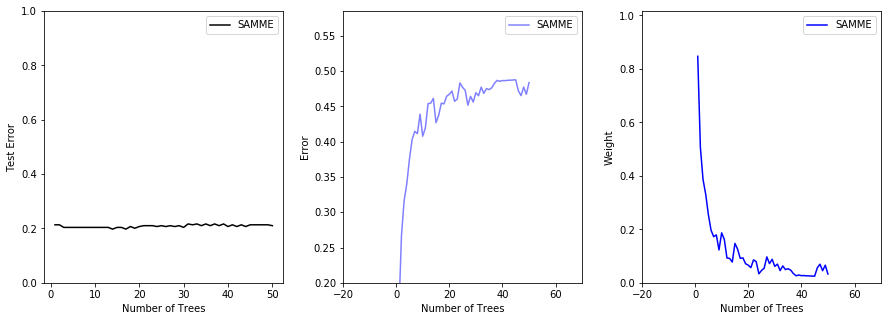

In [58]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')

plt.legend()
plt.ylim(0.0, 1.0)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim(.2, discrete_estimator_errors.max()* 1.2)
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim(0, discrete_estimator_weights.max() * 1.2)
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

In [65]:
bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3, min_samples_split=5, max_leaf_nodes=8),
    n_estimators=50,
    learning_rate=0.01,
    algorithm="SAMME")
bdt_discrete.fit(X_train, y_train)

bdt_discrete1 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3, min_samples_split=5, max_leaf_nodes=8),
    n_estimators=50,
    learning_rate=0.1,
    algorithm="SAMME")
bdt_discrete1.fit(X_train, y_train)

bdt_discrete2 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3, min_samples_split=5, max_leaf_nodes=8),
    n_estimators=50,
    learning_rate=1,
    algorithm="SAMME")
bdt_discrete2.fit(X_train, y_train)


n_trees_discrete = len(bdt_discrete)

discrete_test_errors = []
discrete_test_errors1 = []
discrete_test_errors2 = []
for discrete_train_predict in bdt_discrete.staged_predict(X_test):
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, y_test))
for discrete_train_predict in bdt_discrete1.staged_predict(X_test):
    discrete_test_errors1.append(
        1. - accuracy_score(discrete_train_predict, y_test))
for discrete_train_predict in bdt_discrete2.staged_predict(X_test):
    discrete_test_errors2.append(
        1. - accuracy_score(discrete_train_predict, y_test))
# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
discrete_estimator_errors1 = bdt_discrete1.estimator_errors_[:n_trees_discrete]
discrete_estimator_errors2 = bdt_discrete2.estimator_errors_[:n_trees_discrete]

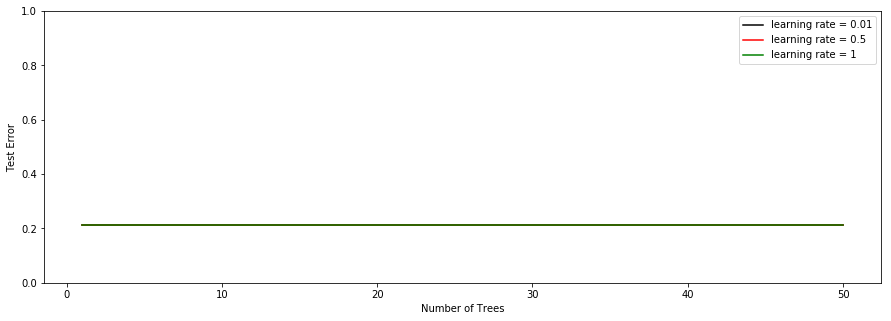

In [66]:
plt.figure(figsize=(15, 5))
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='learning rate = 0.01')

plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='red', label='learning rate = 0.5')

plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='green', label='learning rate = 1')

plt.legend()
plt.ylim(0.0, 1.0)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')
plt.show()

k-Nearest Neighbors. You should "implement" (the quotes mean I don't mean it: steal the code) kNN. Use different values of k.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

In [76]:
# creating list of K for KNN
k_list = list(range(100,500,20))
# creating list of cv scores
cv_scores = []
cv_scores1 = []
# perform 5-fold cross validation
for k in k_list:
    knn = neighbors.KNeighborsClassifier(k, 'distance')
    knn1 = neighbors.KNeighborsClassifier(k, 'uniform')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    scores1 = cross_val_score(knn1, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    cv_scores1.append(scores1.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
MSE1 = [1 - x for x in cv_scores1]

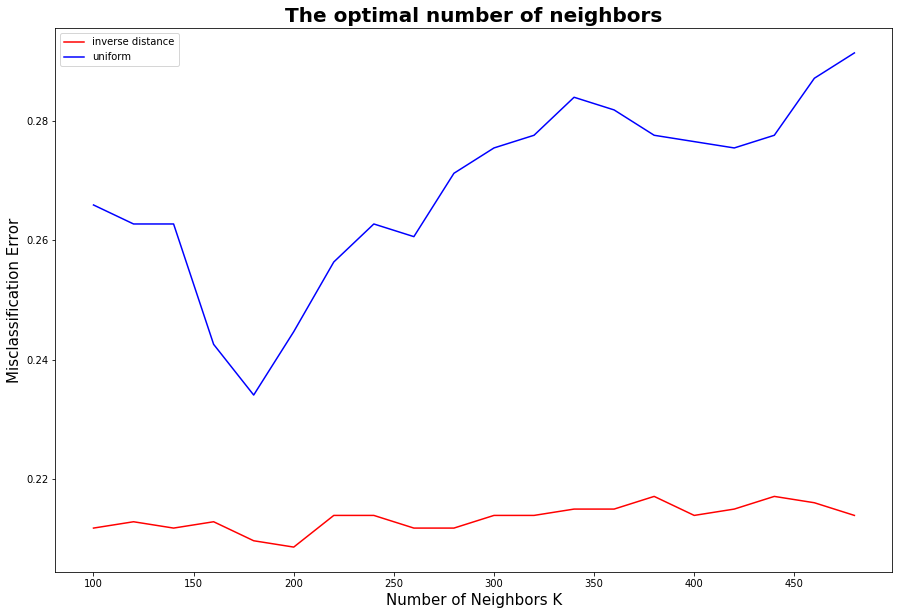

In [80]:
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
#sns.set_style("whitegrid")
plt.plot(k_list, MSE, c='red', label='inverse distance')
plt.plot(k_list, MSE1, c='blue', label='uniform')
plt.legend()
plt.show()

Support Vector Machines. You should implement (for sufficently loose definitions of implement including "download") SVMs. This should be done in such a way that you can swap out kernel functions. I'd like to see at least two.

In [17]:
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [18]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameter
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [19]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = [svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C)]
models = [clf.fit(X_train, y_train) for clf in models]

In [99]:
# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
scores = []
for clf in models:
    scores.append(clf.score(X_test, y_test))

In [100]:
 scores

[0.7866242038216561,
 0.7866242038216561,
 0.79299363057324845,
 0.75159235668789814]

In [22]:
# cross validation for rbf 
stratifiedKFold = StratifiedKFold(5, False, 0)
gs = GridSearchCV(svm.SVC(kernel='rbf', C=C),
                  param_grid={'gamma': np.linspace(0,1,10)},
                  scoring=scoring, cv = stratifiedKFold, refit='F1')
gs.fit(train_x_selected, target_y)
results = gs.cv_results_

/Users/shuyi/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shuyi/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_Accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/shuyi/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_Accuracy'), which will not b

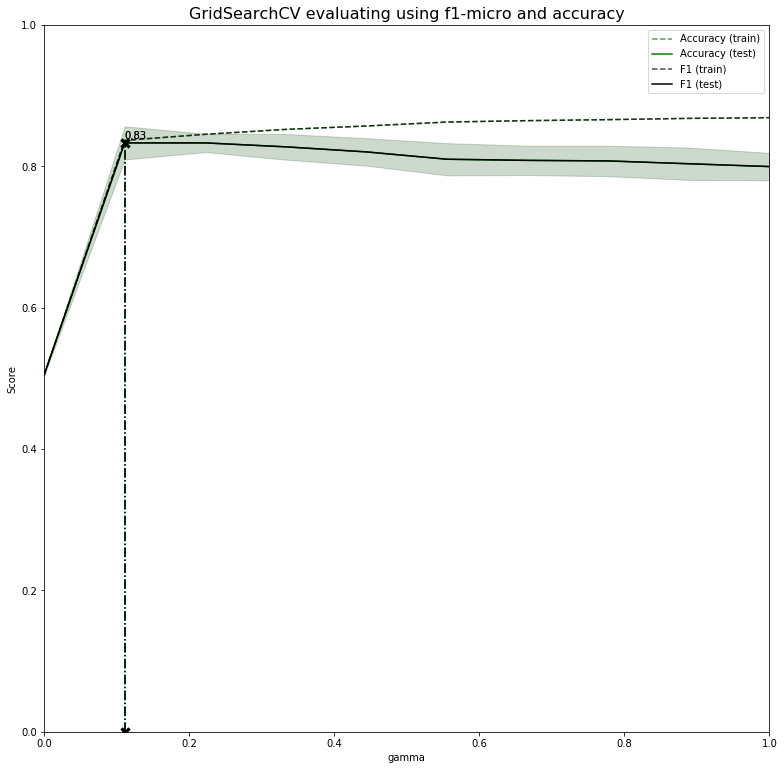

In [25]:
plotCV(results, "gamma", 0, 1, 0.1)

Best gamma is 0.12

Neural Networks. For the neural network you should implement or steal your favorite kind of network and training algorithm. You may use networks of nodes with as many layers as you like and any activation function you see fit.

In [13]:
#Keras_NN_Classifier: deep feed-forward network with categorical crossentropy objective.
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras.utils import np_utils
from sklearn import preprocessing
from sklearn.base import BaseEstimator
from keras.wrappers.scikit_learn import KerasClassifier

/Users/shuyi/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [14]:
X_train, X_test, y_train, y_test = train_test_split(train_x_selected, target_y, random_state=0)

In [51]:
def create_baseline():
    # create model
    model = Sequential()
    dim = train_x_selected.shape[1]
    model.add(Dense(60, input_dim=dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [52]:
estimator = KerasClassifier(build_fn=create_baseline, nb_epoch=100, batch_size=5, verbose=0)

In [56]:
estimator.fit(X_train, y_train)

In [57]:
estimator.score(X_test, y_test)

0.7675159341970067

In [58]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, nb_epoch=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(estimator, train_x_selected, target_y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 78.07% (2.90%)


Tuning Layers and Number of Neurons in The Model

In this experiment, we take our baseline model with 60 neurons in the hidden layer and reduce it by half to 30. This will put pressure on the network during training to pick out the most important structure in the input data to model.

In [64]:
def create_smaller():
    # create model
    model = Sequential()
    dim = train_x_selected.shape[1]
    model.add(Dense(30, input_dim=dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [65]:
# evaluate model 
estimator_small = KerasClassifier(build_fn=create_smaller, nb_epoch=100, batch_size=5, verbose=0)
results_small = cross_val_score(estimator_small, train_x_selected, target_y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results_small.mean()*100, results_small.std()*100))

Results: 77.76% (2.98%)


In [66]:
def create_larger():
    # create model
    model = Sequential()
    dim = train_x_selected.shape[1]
    model.add(Dense(60, input_dim=dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [97]:
# evaluate model with standardized dataset
estimator_larger = KerasClassifier(build_fn=create_larger, nb_epoch=100, batch_size=5, verbose=0)
results_larger = cross_val_score(estimator_larger, train_x_selected, target_y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results_larger.mean()*100, results_larger.std()*100))

Results: 79.04% (3.87%)


In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
model = Sequential()
dim = train_x_selected.shape[1]
model.add(Dense(60, input_dim=dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(30, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=10, verbose=0)

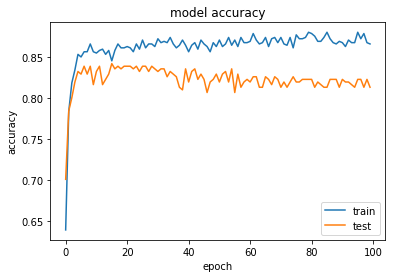

In [77]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [25]:
def plot_accuracy(hidden_unit):
    model = Sequential()
    dim = train_x_selected.shape[1]
    model.add(Dense(hidden_unit, input_dim=dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(int(hidden_unit/2), kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_split=0.33, epochs=30, batch_size=10, verbose=0)
    return model

In [30]:
hidden_units = [10, 20, 50, 100, 150, 200, 250, 300]
re = []
for h in hidden_units:
    re.append(plot_accuracy(h))    

314/314 [==============================] - 0s 43us/step


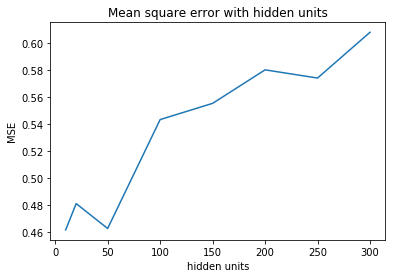

In [32]:
import matplotlib.pyplot as plt
plt.figure()
accuracy = []
for r in re:
    accuracy.append(r.evaluate(X_test, y_test)[0])
plt.plot(hidden_units, accuracy)
plt.title('Mean square error with hidden units')
plt.ylabel('MSE')
plt.xlabel('hidden units')
plt.show()

In [31]:
re[2].evaluate(X_test, y_test)

314/314 [==============================] - 0s 36us/step


[0.4623751378363105, 0.7993630561858985]

In [ ]:
hidd